
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>
 
 
# Laboratorio: Análisis y Modelado de Series Temporales con SARIMAX

En este laboratorio, practicarás el análisis y modelado de series temporales utilizando el modelo SARIMAX. 
Objetivos del laboratorio

- Analizar series temporales:
	
    - Identificar tendencias, estacionalidad y posibles rupturas estructurales en los datos.
	
    - Verificar la estacionaridad de la serie mediante pruebas estadísticas y visuales.
	
    - Realizar análisis de autocorrelación (ACF) y autocorrelación parcial (PACF).

- Modelar la serie temporal:
	
    - Ajustar un modelo SARIMAX adecuado para los datos proporcionados.
	
    - Evaluar los resultados del modelo e interpretar los parámetros obtenidos.

- Interpretar gráficas y resultados:
	
    - Explicar de forma detallada el significado de las gráficas y resultados generados durante cada etapa del análisis.

# Instrucciones

- Parte 1: Carga y exploración inicial de los datos

    - Descarga el conjunto de datos proporcionado, que contiene una serie temporal de valores relacionados con ventas mensuales de una empresa ficticia durante los últimos 5 años.

    - Realiza una exploración inicial:

        - Gráfica la serie temporal completa para identificar posibles tendencias y estacionalidades.

        - Comenta tus observaciones iniciales sobre los patrones que encuentres.

- Parte 2: Estacionaridad


    - Evalúa si la serie es estacionaria:

    - Aplica el test de Dickey-Fuller aumentado (ADF).

    - Si es necesario, realiza transformaciones (diferenciación o logaritmos) para convertir la serie en estacionaria.

    - Genera una gráfica comparativa que muestre la serie original y la transformada, indicando las diferencias visuales.

    - Escribe una interpretación de los resultados del test ADF y de la gráfica.

- Parte 3: Análisis de autocorrelaciones


    - Genera los gráficos de ACF (Autocorrelation Function) y PACF (Partial Autocorrelation Function).

    - Identifica:

        - El orden de diferenciación necesario (si aún no lo has hecho).

        - Los posibles valores para los parámetros p y q del modelo SARIMAX.

    - Explica qué indican las autocorrelaciones encontradas y cómo las utilizarás para definir los parámetros del modelo.

- Parte 4: Ajuste del modelo SARIMAX


    - Ajusta un modelo SARIMAX utilizando los parámetros identificados.

    - Evalúa el ajuste:

        - Observa los residuos del modelo.

        - Verifica si cumplen las condiciones de ruido blanco mediante análisis visual y pruebas estadísticas.

    - Ajusta el modelo si es necesario, iterando sobre los parámetros.

- Parte 5: Interpretación y predicción


    - Interpreta los coeficientes estimados del modelo (incluyendo estacionalidad y efectos externos si aplican).

    - Genera una predicción para los próximos 12 meses.

    - Gráfica las predicciones junto con la serie temporal original.

    - Comenta sobre:

        - La calidad de las predicciones.

        - La utilidad del modelo para la toma de decisiones.



In [34]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
from itertools import combinations

# Otros objetivos
# -----------------------------------------------------------------------
import sys
import os

# Ruta relativa desde notebooks/1-Preprocesing/ a src/
src_path = "../src/"
sys.path.append(src_path)

import support_series_temp as sp 
# Para no tener que reiniciar el kernel
%load_ext autoreload
%autoreload 2

# Visualizaciones
# -----------------------------------------------------------------------
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


# Analisis Exploratorio Series Temporales
# -----------------------------------------------------------------------
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Modelo Series Temporales
# -----------------------------------------------------------------------
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from itertools import product


# Otros
# -----------------------------------------------------------------------
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
df1=pd.read_csv("../data/Truck_sales.csv")
df=df1.copy()
# Convertir `Month-Year` a tipo datetime
df["Month-Year"] = pd.to_datetime(df["Month-Year"], format="%y-%b")

# Establecer `Month-Year` como índice
df.set_index("Month-Year", inplace=True)
df

,Number_Trucks_Sold
Month-Year,
2003-01-01,155
2003-02-01,173
2003-03-01,204
2003-04-01,219
2003-05-01,223
...,...
2014-08-01,933
2014-09-01,704
2014-10-01,639


Resumen estadístico:


count    144.000000
mean     428.729167
std      188.633037
min      152.000000
25%      273.500000
50%      406.000000
75%      560.250000
max      958.000000
Name: Number_Trucks_Sold, dtype: float64


Primeros datos:


,Number_Trucks_Sold
Month-Year,
2003-01-01,155
2003-02-01,173
2003-03-01,204
2003-04-01,219
2003-05-01,223



Últimos datos:


,Number_Trucks_Sold
Month-Year,
2014-08-01,933
2014-09-01,704
2014-10-01,639
2014-11-01,571
2014-12-01,666


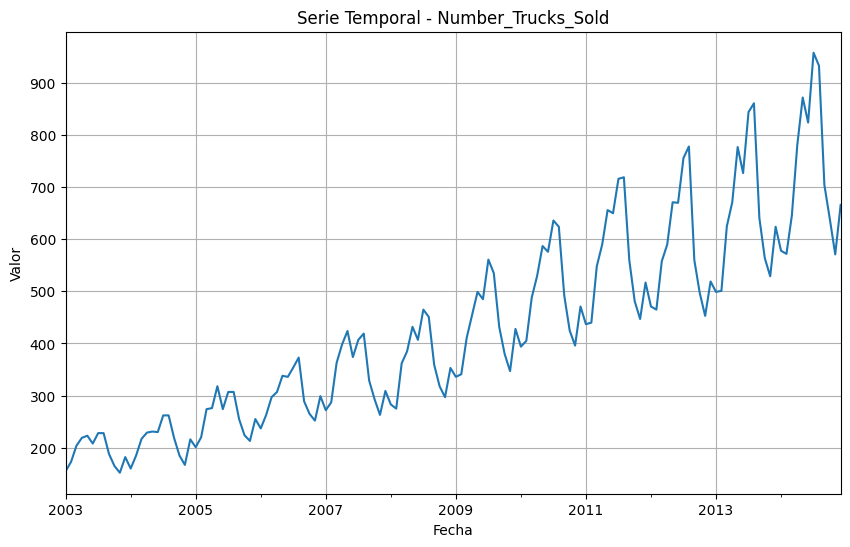

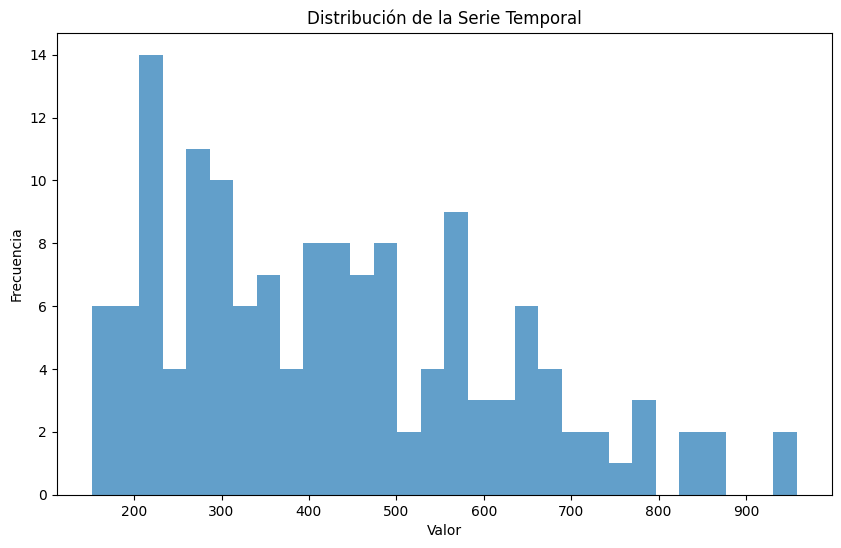

{}

In [36]:
sp.exploracion_datos(df,"Number_Trucks_Sold",frecuencia=12)

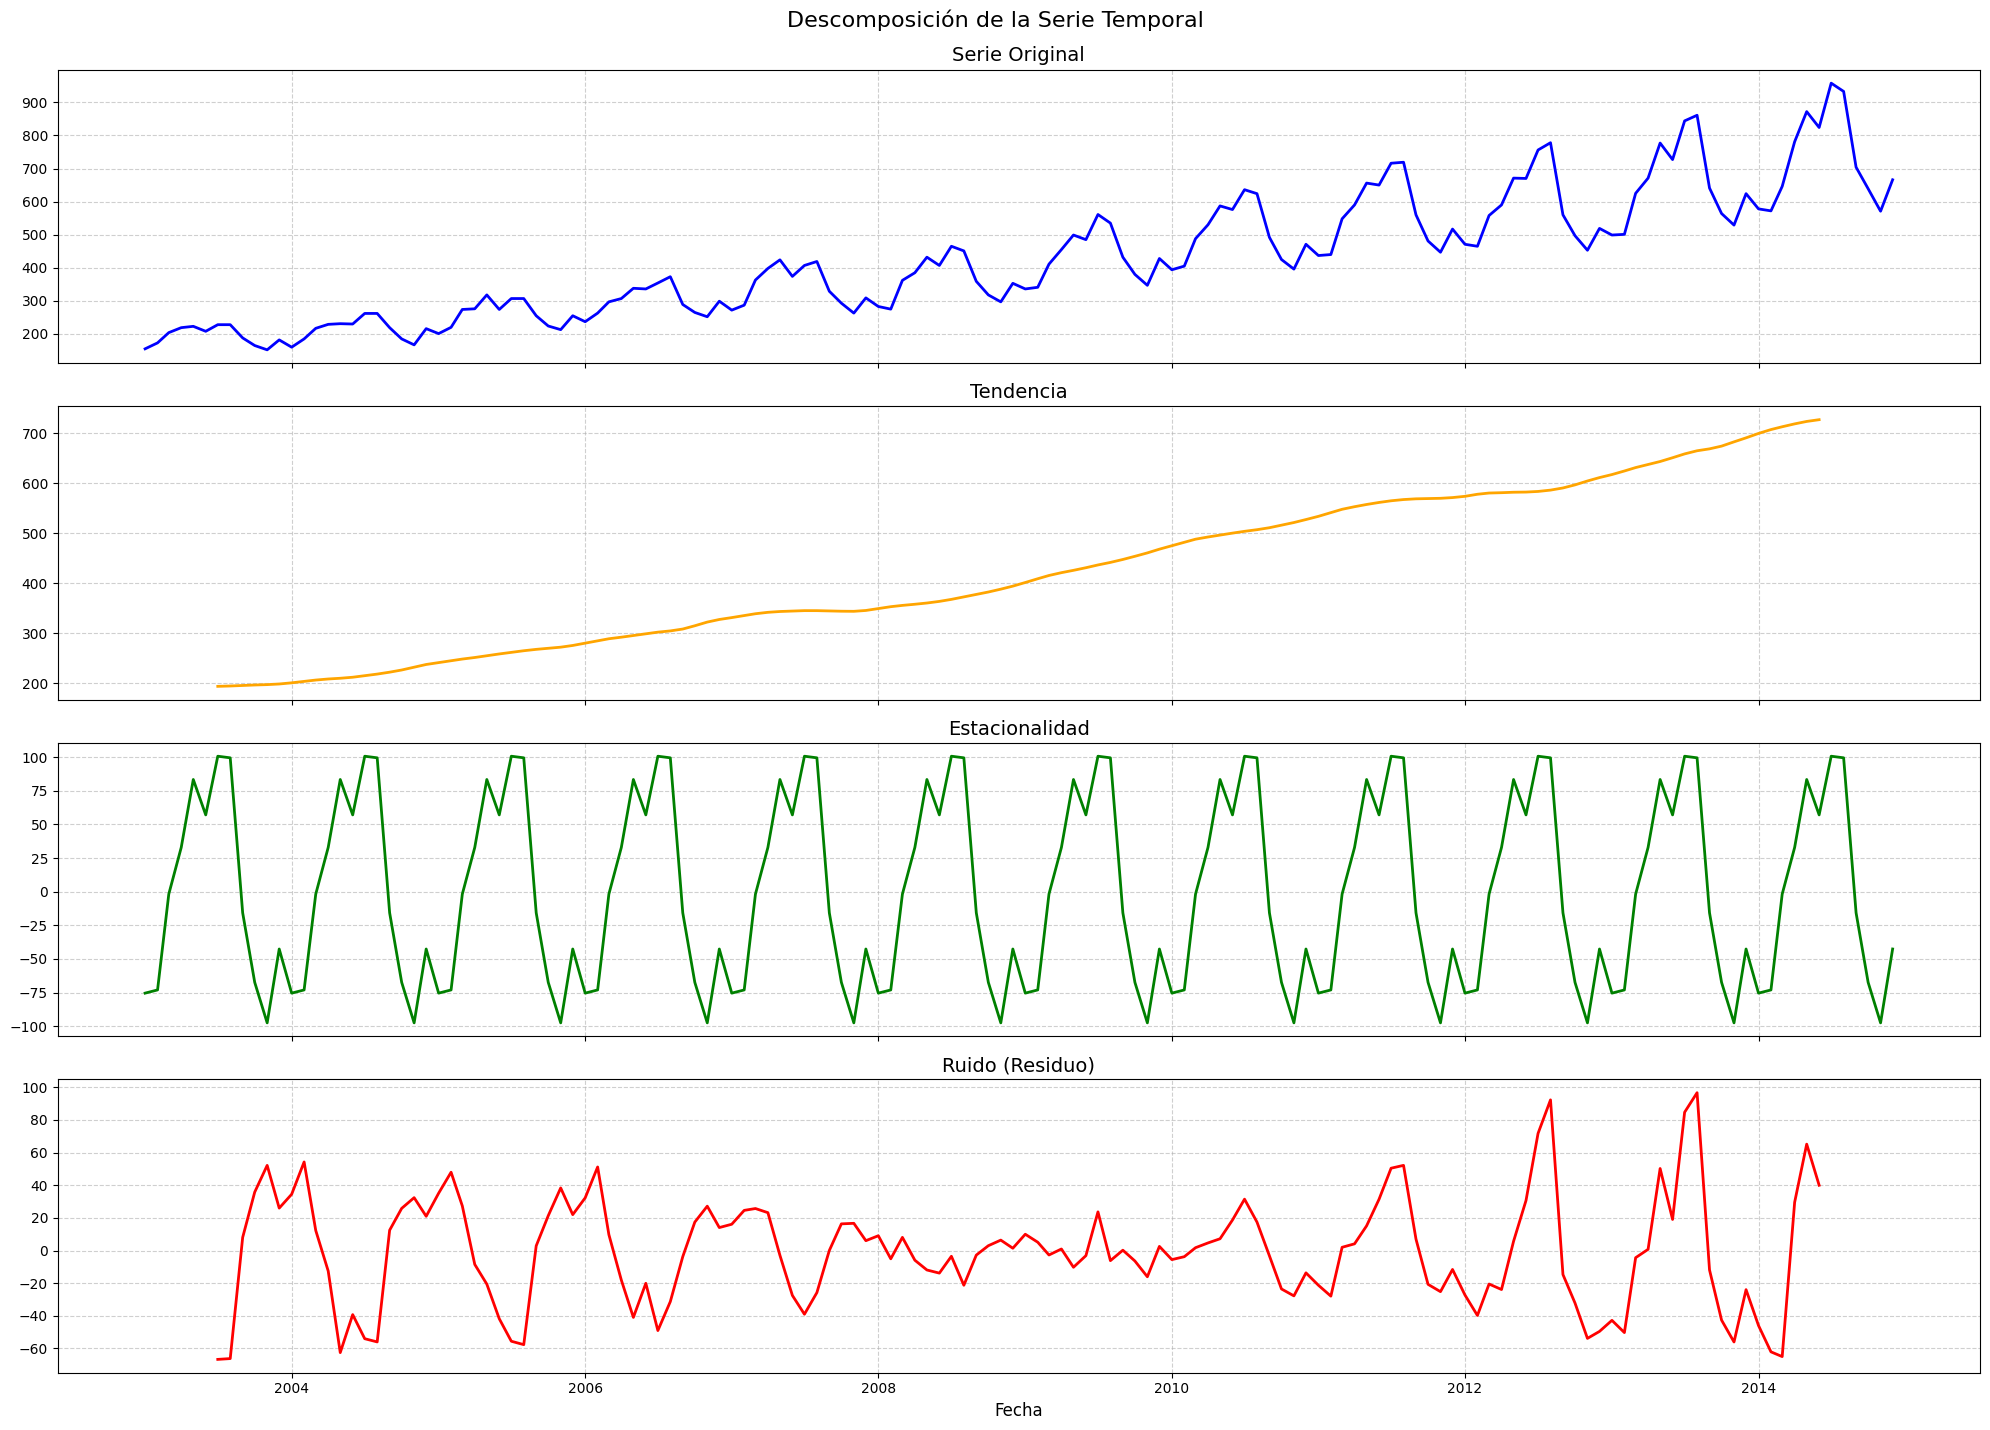

In [37]:
sp.exploracion_grafica(df,"Number_Trucks_Sold")

In [44]:
sp.aplicar_adf_test(df, alpha=0.05)

Resultados del Test de Dickey-Fuller Aumentado (ADF):
Estadístico del Test: 1.1159
Valor p: 0.9954
Número de Lags: 14
Número de Observaciones: 129
Valores Críticos:
  1%: -3.4821
  5%: -2.8842
  10%: -2.5789

¿Es la serie estacionaria? No (Nivel de significancia: 0.05)


{'Estadístico del Test': np.float64(1.1158932574252591),
 'Valor p': np.float64(0.9953500083802601),
 'Lags Utilizados': 14,
 'Número de Observaciones': 129,
 'Valores Críticos': {'1%': np.float64(-3.482087964046026),
  '5%': np.float64(-2.8842185101614626),
  '10%': np.float64(-2.578864381347275)},
 'Estacionariedad': np.False_}

In [45]:
# Diferenciación simple
serie_diferenciada = df.diff().dropna()

# Test ADF después de la diferenciación
sp.aplicar_adf_test(serie_diferenciada)


Resultados del Test de Dickey-Fuller Aumentado (ADF):
Estadístico del Test: -2.5414
Valor p: 0.1057
Número de Lags: 14
Número de Observaciones: 128
Valores Críticos:
  1%: -3.4825
  5%: -2.8844
  10%: -2.5790

¿Es la serie estacionaria? No (Nivel de significancia: 0.05)


{'Estadístico del Test': np.float64(-2.541355326769916),
 'Valor p': np.float64(0.10573354923819672),
 'Lags Utilizados': 14,
 'Número de Observaciones': 128,
 'Valores Críticos': {'1%': np.float64(-3.4825006939887997),
  '5%': np.float64(-2.884397984161377),
  '10%': np.float64(-2.578960197753906)},
 'Estacionariedad': np.False_}

In [46]:
# Transformación logarítmica (asegúrate de que no haya valores negativos o cero)
serie_log = np.log(df[df > 0])

# Test ADF después de la transformación
sp.aplicar_adf_test(serie_log)

Resultados del Test de Dickey-Fuller Aumentado (ADF):
Estadístico del Test: -1.7240
Valor p: 0.4188
Número de Lags: 13
Número de Observaciones: 130
Valores Críticos:
  1%: -3.4817
  5%: -2.8840
  10%: -2.5788

¿Es la serie estacionaria? No (Nivel de significancia: 0.05)


{'Estadístico del Test': np.float64(-1.724033419055164),
 'Valor p': np.float64(0.4187742062341192),
 'Lags Utilizados': 13,
 'Número de Observaciones': 130,
 'Valores Críticos': {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 'Estacionariedad': np.False_}

# Parte 3: Análisis de autocorrelaciones

- Genera los gráficos de ACF (Autocorrelation Function) y PACF (Partial Autocorrelation Function).

- Identifica:

    - El orden de diferenciación necesario (si aún no lo has hecho).

    - Los posibles valores para los parámetros p y q del modelo SARIMAX.

- Explica qué indican las autocorrelaciones encontradas y cómo las utilizarás para definir los parámetros del modelo.

In [48]:
sp.calcular_lags_recomendados(df)

{'sqrt': 12, 'n4': 36}

In [49]:
sqrt=12
n4= 36

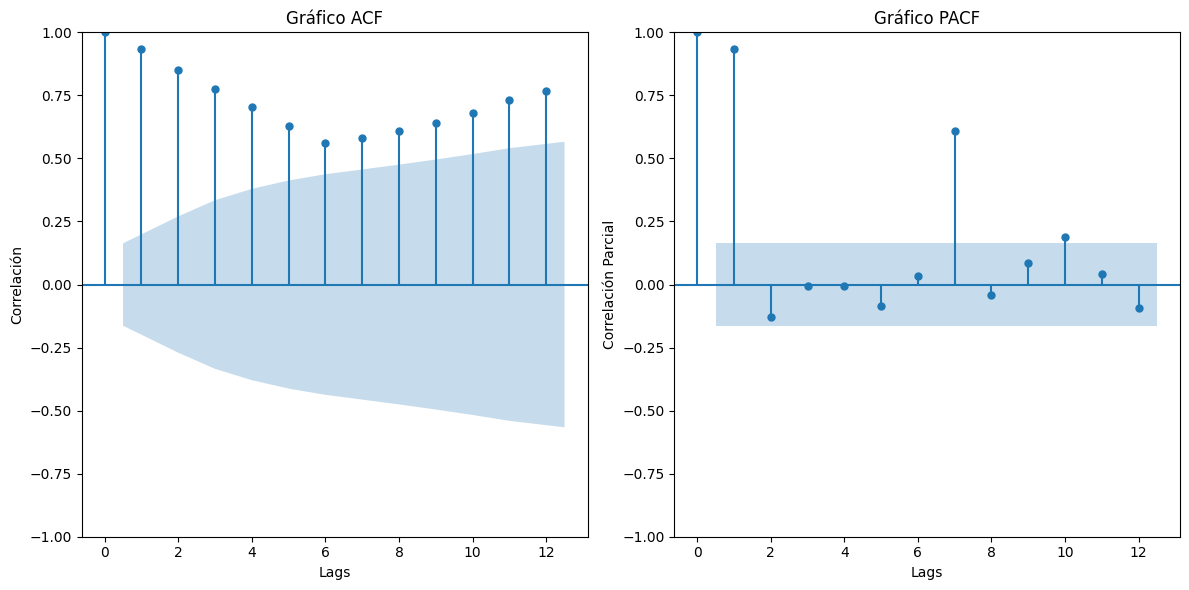

In [50]:
sp.graficar_acf_pacf(df, lags=sqrt)

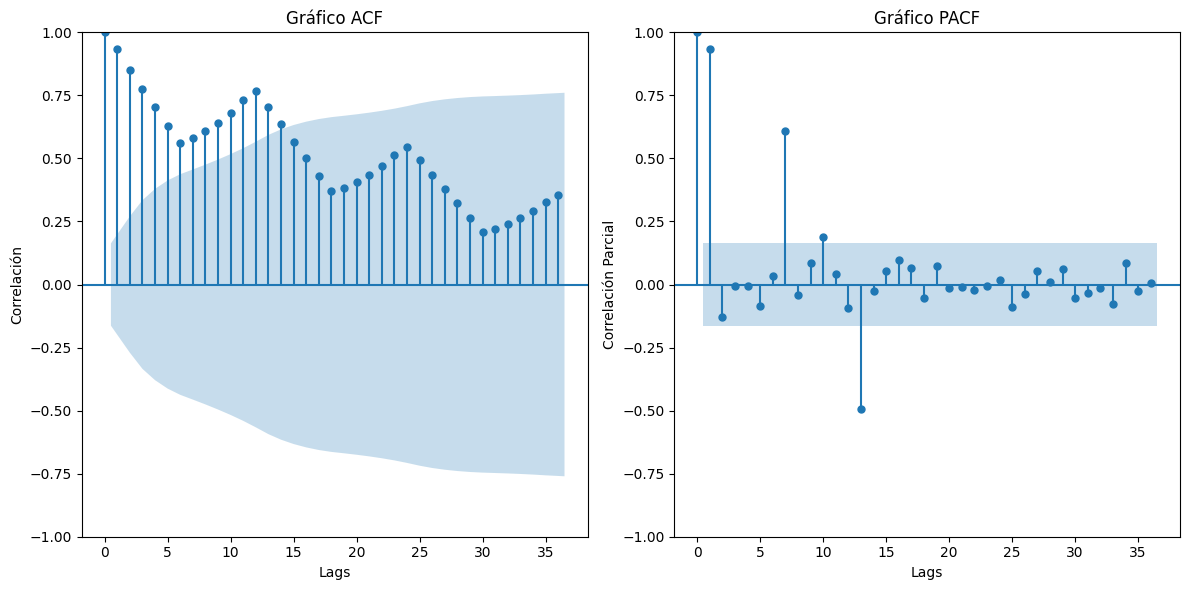

In [51]:
sp.graficar_acf_pacf(df, lags=n4)

# Parte 4: Ajuste del modelo SARIMAX


- Ajusta un modelo SARIMAX utilizando los parámetros identificados.

- Evalúa el ajuste:

    - Observa los residuos del modelo.

    - Verifica si cumplen las condiciones de ruido blanco mediante análisis visual y pruebas estadísticas.

- Ajusta el modelo si es necesario, iterando sobre los parámetros.

In [53]:
sp.entrenar_sarimax(df, "Number_Trucks_Sold", train_ratio=0.8, seasonal_order=(1, 1, 1, 12), max_p=3, max_q=10)

C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\alexc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\Local

{'modelo': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x1634566eab0>,
 'train': Month-Year
 2003-01-01    155
 2003-02-01    173
 2003-03-01    204
 2003-04-01    219
 2003-05-01    223
              ... 
 2012-03-01    558
 2012-04-01    590
 2012-05-01    671
 2012-06-01    670
 2012-07-01    756
 Name: Number_Trucks_Sold, Length: 115, dtype: int64,
 'test': Month-Year
 2012-08-01    778
 2012-09-01    560
 2012-10-01    497
 2012-11-01    453
 2012-12-01    519
 2013-01-01    499
 2013-02-01    501
 2013-03-01    625
 2013-04-01    671
 2013-05-01    777
 2013-06-01    727
 2013-07-01    844
 2013-08-01    861
 2013-09-01    641
 2013-10-01    564
 2013-11-01    529
 2013-12-01    624
 2014-01-01    578
 2014-02-01    572
 2014-03-01    646
 2014-04-01    781
 2014-05-01    872
 2014-06-01    824
 2014-07-01    958
 2014-08-01    933
 2014-09-01    704
 2014-10-01    639
 2014-11-01    571
 2014-12-01    666
 Name: Number_Trucks_Sold, dtype: int64,
 'p': 1,
 'q': 3

In [ ]:
train_size = int(len(df) * 0.8)
train, test = df["Number_Trucks_Sold"][:train_size], df["Number_Trucks_Sold"][train_size:]
modelo_sarimax= SARIMAX(train, 
                order=(1, 1, 3),  # ARIMA(p, d, q)
                seasonal_order=(1, 1, 1, 12)).fit(disp=False)

# Predicciones en el conjunto de prueba
predicciones = modelo_sarimax.predict(start=train_size, end=len(df)-1)

In [ ]:
sp.evaluar_ruido_blanco(modelo_sarimax, train, test, df, "Number_Trucks_Sold")

# Parte 5: Interpretación y predicción


- Interpreta los coeficientes estimados del modelo (incluyendo estacionalidad y efectos externos si aplican).

    - Genera una predicción para los próximos 12 meses.

    - Gráfica las predicciones junto con la serie temporal original.

    - Comenta sobre:

        - La calidad de las predicciones.

        - La utilidad del modelo para la toma de decisiones.